In [3]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vkart\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [8]:
import pandas as pd

data = pd.read_csv(r'twitter_training.csv', encoding='utf-8')
v_data = pd.read_csv(r'twitter_validation.csv', encoding='utf-8')
# If delimiter is not comma, specify explicitly
# data = pd.read_csv(r'twitter_training.csv', delimiter=';')

print(data.head())
print(v_data.head())


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0

In [9]:
data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
7328,9260,Overwatch,Negative,stabbing overwatch just sucked way more dick t...
7329,9260,Overwatch,Negative,stabbing overwatch has always sucked way over ...
7330,9260,Overwatch,Negative,stabbing person has sucked way more dick than you
7331,9261,Overwatch,Irrelevant,The US police emerged from night watches who t...


In [10]:
v_data

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [11]:
data.columns = ['id', 'game', 'sentiment', 'text']
v_data.columns = ['id', 'game', 'sentiment', 'text']

In [12]:
data

,id,game,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
7328,9260,Overwatch,Negative,stabbing overwatch just sucked way more dick t...
7329,9260,Overwatch,Negative,stabbing overwatch has always sucked way over ...
7330,9260,Overwatch,Negative,stabbing person has sucked way more dick than you
7331,9261,Overwatch,Irrelevant,The US police emerged from night watches who t...


In [13]:
v_data

,id,game,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [14]:
data.shape

(7333, 4)

In [15]:
data.columns

Index(['id', 'game', 'sentiment', 'text'], dtype='object')

In [16]:
data.describe(include='all')

,id,game,sentiment,text
count,7333.000000,7333,7333,7250
unique,NaN,4,4,6892
top,NaN,CallOfDutyBlackopsColdWar,Positive,
freq,NaN,2376,2327,19
mean,1905.423292,NaN,NaN,NaN
std,1920.729134,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,317.000000,NaN,NaN,NaN
50%,1829.000000,NaN,NaN,NaN
75%,2542.000000,NaN,NaN,NaN


In [17]:
id_types = data['id'].value_counts()
id_types

id
1834    6
38      6
45      6
44      6
43      6
       ..
1624    6
1623    6
9259    6
2401    5
9261    2
Name: count, Length: 1223, dtype: int64

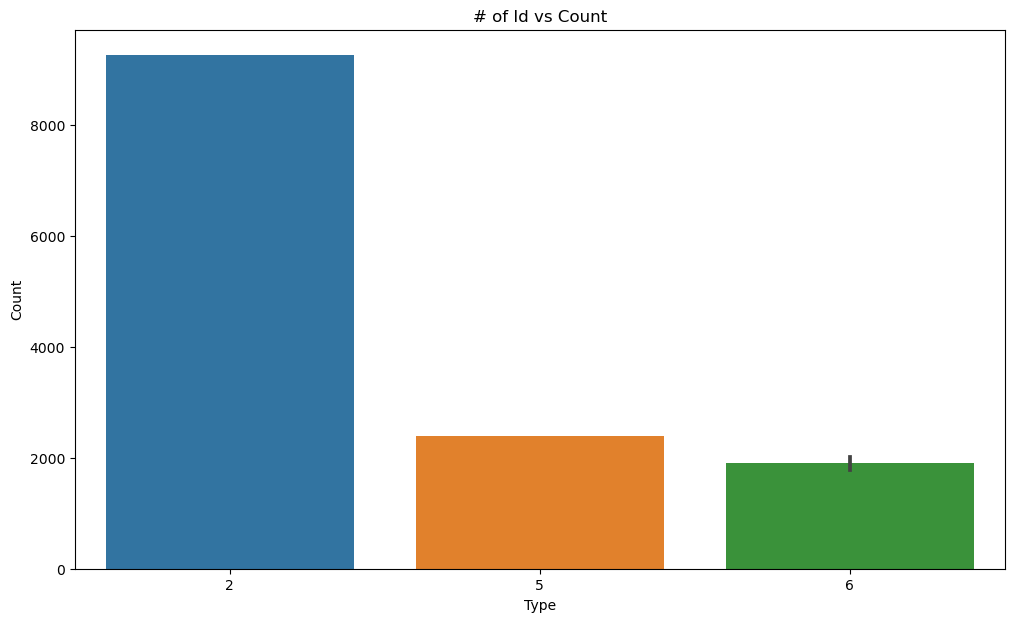

In [18]:
plt.figure(figsize=(12,7))
sns.barplot(y=id_types.index, x=id_types.values)  
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of Id vs Count')
plt.show()

In [19]:
game_types = data['game'].value_counts()
game_types

game
CallOfDutyBlackopsColdWar    2376
Amazon                       2316
Borderlands                  2285
Overwatch                     356
Name: count, dtype: int64

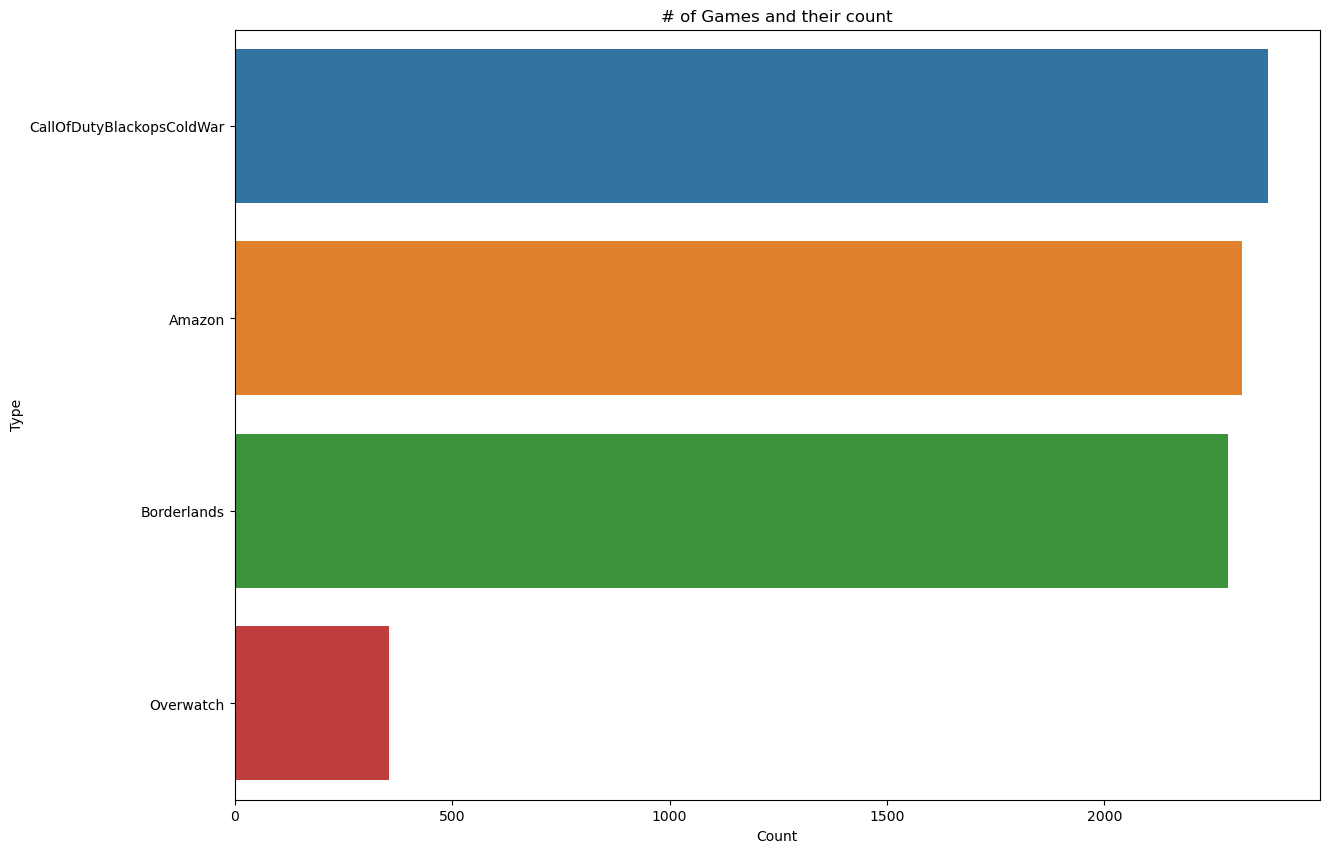

In [20]:
plt.figure(figsize=(14,10))

sns.barplot(x=game_types.values,y=game_types.index)  
plt.title('# of Games and their count')
plt.ylabel('Type')
plt.xlabel('Count')

plt.show()

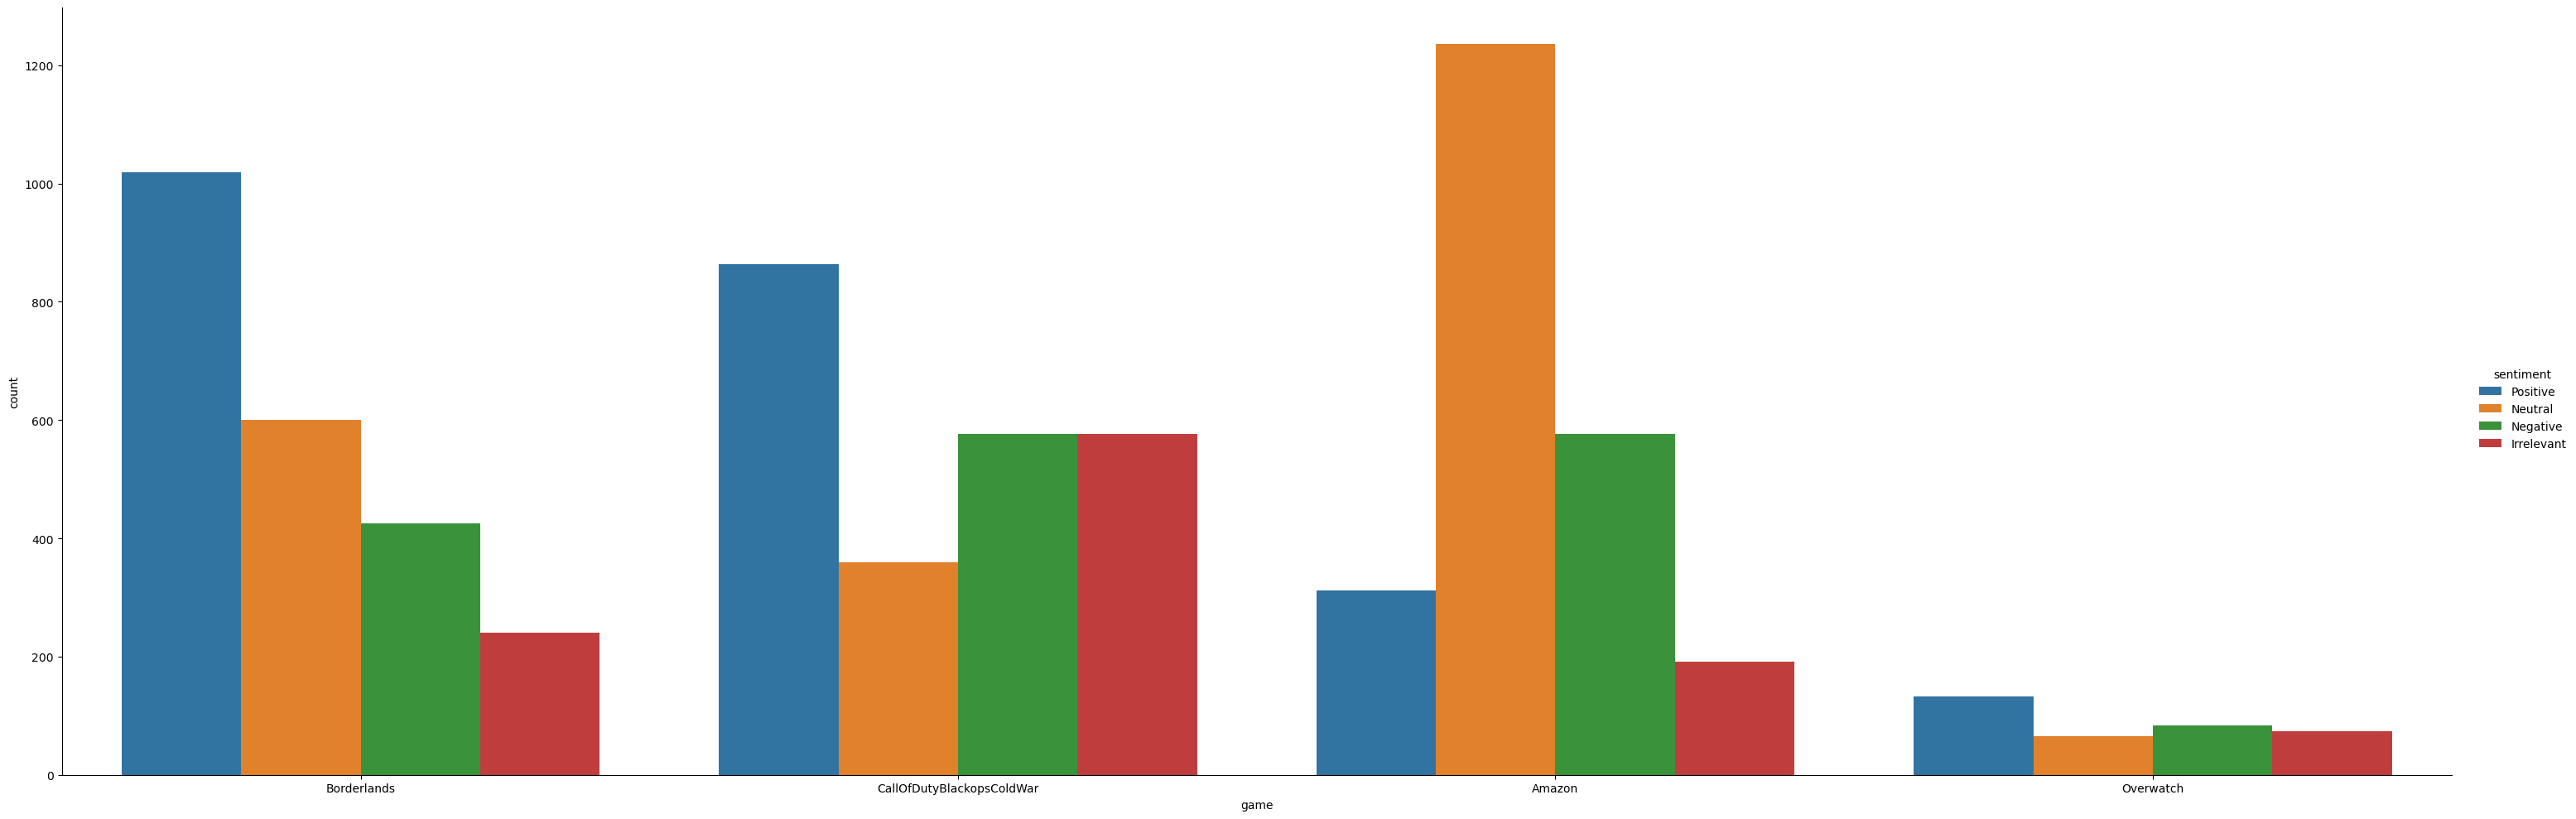

In [21]:
sns.catplot(x="game",hue="sentiment", kind="count",height=10,aspect=3, data=data)

<Axes: >

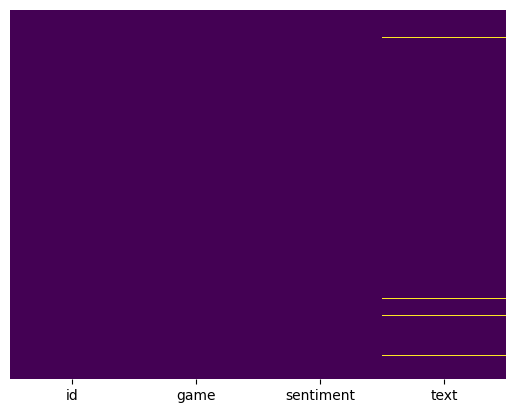

In [22]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
total_null=data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  7333


,Total Missing,In Percent
text,83,1.13
id,0,0.00
game,0,0.00
sentiment,0,0.00


In [24]:
data.dropna(subset=['text'],inplace=True)

total_null=data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  7250


,Total Missing,In Percent
id,0,0.0
game,0,0.0
sentiment,0,0.0
text,0,0.0


In [25]:
train0=data[data['sentiment']=="Negative"]
train1=data[data['sentiment']=="Positive"]
train2=data[data['sentiment']=="Irrelevant"]
train3=data[data['sentiment']=="Neutral"]

In [26]:
train0.shape, train1.shape, train2.shape, train3.shape

((1651, 4), (2311, 4), (1066, 4), (2222, 4))

In [27]:
train0=train0[:int(train0.shape[0]/12)]
train1=train1[:int(train1.shape[0]/12)]
train2=train2[:int(train2.shape[0]/12)]
train3=train3[:int(train3.shape[0]/12)]

In [28]:
train0.shape, train1.shape, train2.shape, train3.shape

((137, 4), (192, 4), (88, 4), (185, 4))

In [29]:
data=pd.concat([train0,train1,train2,train3],axis=0)
data

,id,game,sentiment,text
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...
27,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...
...,...,...,...,...
638,2511,Borderlands,Neutral,playing borderlands 3 before 2 was a mistake b...
639,2511,Borderlands,Neutral,playing borderlands because 3 before 2 was a f...
640,2511,Borderlands,Neutral,playing those 3 vs 2 was a struggle bc now i k...
647,2515,Borderlands,Neutral,Morning~!!. I'm split on playing PSO2 or Borde...


In [30]:
id_types = data['id'].value_counts()
id_types

id
2405    6
2416    6
2409    6
2408    6
2403    6
       ..
2540    5
2401    5
2542    4
2515    2
2475    1
Name: count, Length: 103, dtype: int64

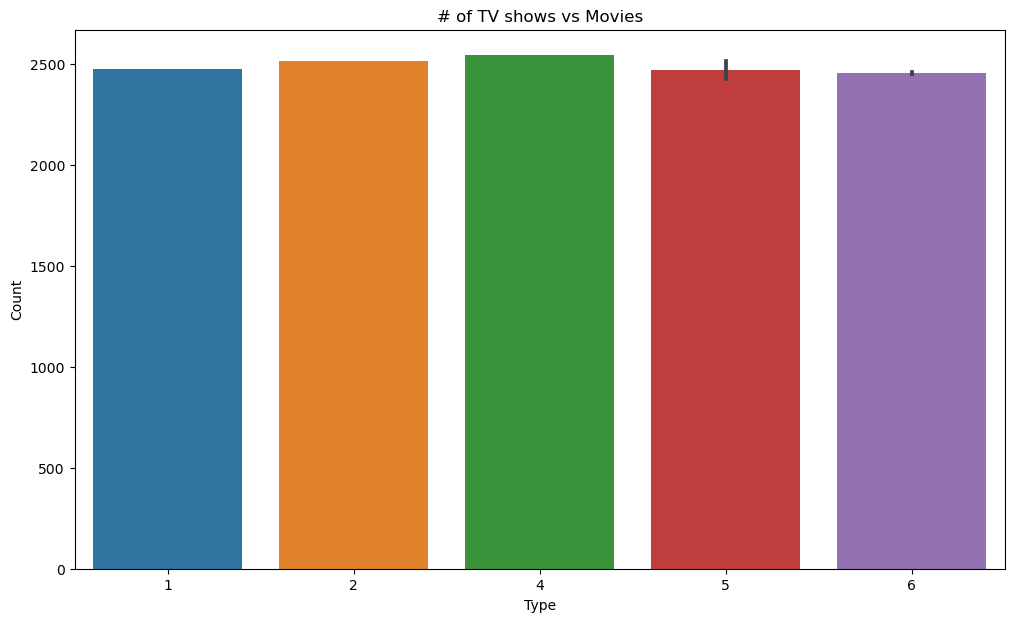

In [31]:
plt.figure(figsize=(12,7))
sns.barplot(x=id_types.values,y=id_types.index)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

In [32]:
game_types = data['game'].value_counts()
game_types

game
Borderlands    602
Name: count, dtype: int64

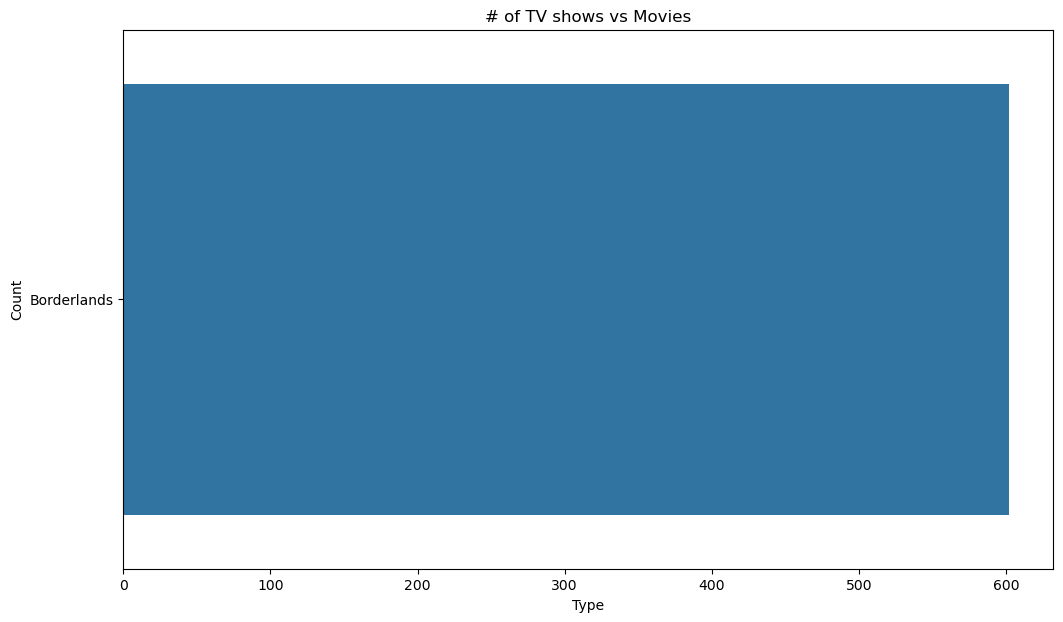

In [33]:
plt.figure(figsize=(12,7))
sns.barplot(x=game_types.values,y=game_types.index)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

In [34]:
sentiment_types = data['sentiment'].value_counts()
sentiment_types

sentiment
Positive      192
Neutral       185
Negative      137
Irrelevant     88
Name: count, dtype: int64

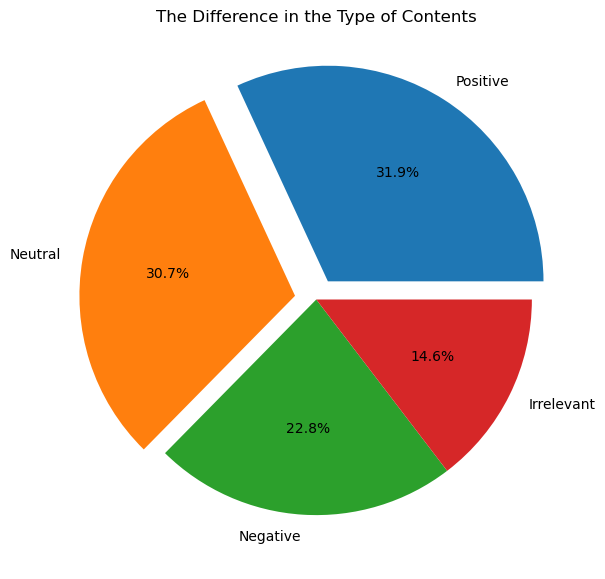

In [35]:
plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title('The Difference in the Type of Contents')
plt.show()

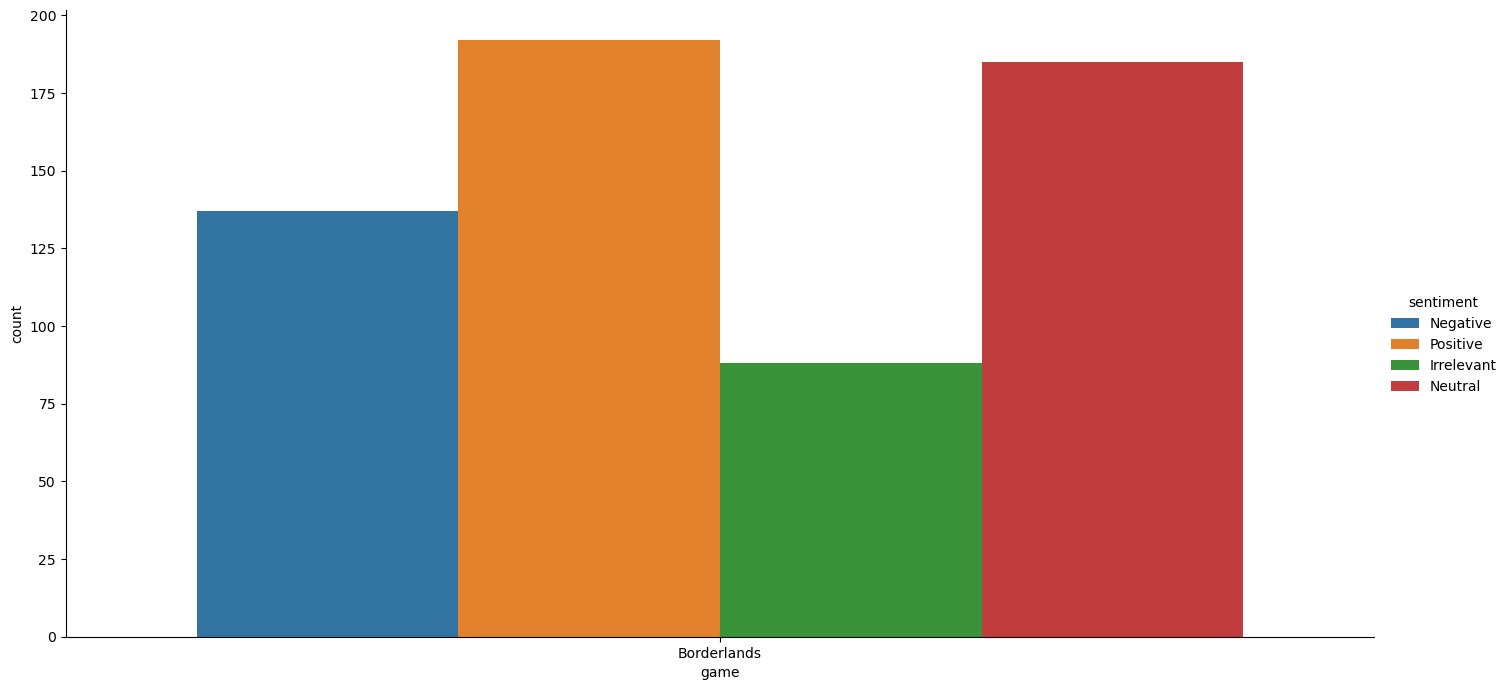

In [36]:
sns.catplot(x='game',hue='sentiment',kind='count',height=7,aspect=2,data=data)

In [37]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [38]:
data['sentiment']=label_encoder.fit_transform(data['sentiment'])
data['game']=label_encoder.fit_transform(data['game'])
v_data['sentiment']=label_encoder.fit_transform(v_data['sentiment'])
v_data['game']=label_encoder.fit_transform(v_data['game'])

In [39]:
data = data.drop(['id'],axis=1)

data

,game,sentiment,text
23,0,1,the biggest dissappoinment in my life came out...
24,0,1,The biggest disappointment of my life came a y...
25,0,1,The biggest disappointment of my life came a y...
26,0,1,the biggest dissappoinment in my life coming o...
27,0,1,For the biggest male dissappoinment in my life...
...,...,...,...
638,0,2,playing borderlands 3 before 2 was a mistake b...
639,0,2,playing borderlands because 3 before 2 was a f...
640,0,2,playing those 3 vs 2 was a struggle bc now i k...
647,0,2,Morning~!!. I'm split on playing PSO2 or Borde...


In [40]:
data.nunique()

game           1
sentiment      4
text         586
dtype: int64

In [41]:
v_data.nunique()

id           999
game          32
sentiment      4
text         998
dtype: int64